# INTRO
<p> <strong>The California House Pricing Dataset</strong> is a comprehensive collection of data detailing housing prices and attributes in <strong>various districts</strong>  of California. It encompasses information such as the location, size, number of bedrooms, bathrooms, and other pertinent features of residential properties. This dataset serves as a valuable resource for analyzing real estate trends, predicting housing prices, and understanding the factors influencing property values in different neighborhoods across California. It provides researchers, analysts, and policymakers with valuable insights into the dynamics of the housing market, aiding in informed decision-making and strategic planning. </p>
<img alt="Image" title="Distribution of House Pricing in California State " src="pricing_in_cal.jpg" />

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# plt.style.use("fivethirtyeight")


# Importing Data

In [2]:
df_housing = pd.read_csv("housing.csv")

In [3]:
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


emmmm there some None values in total_bedrooms we can manpilate that later

# EDA

In [5]:
# Let’s create a copy so you can play with it without harming the  dataset:
c_df = df_housing.copy()

In [6]:
c_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

from data description there are some outliers in data look like in **median_ house_value** feature and ...etc need to transform or deal with 

In [7]:
c_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

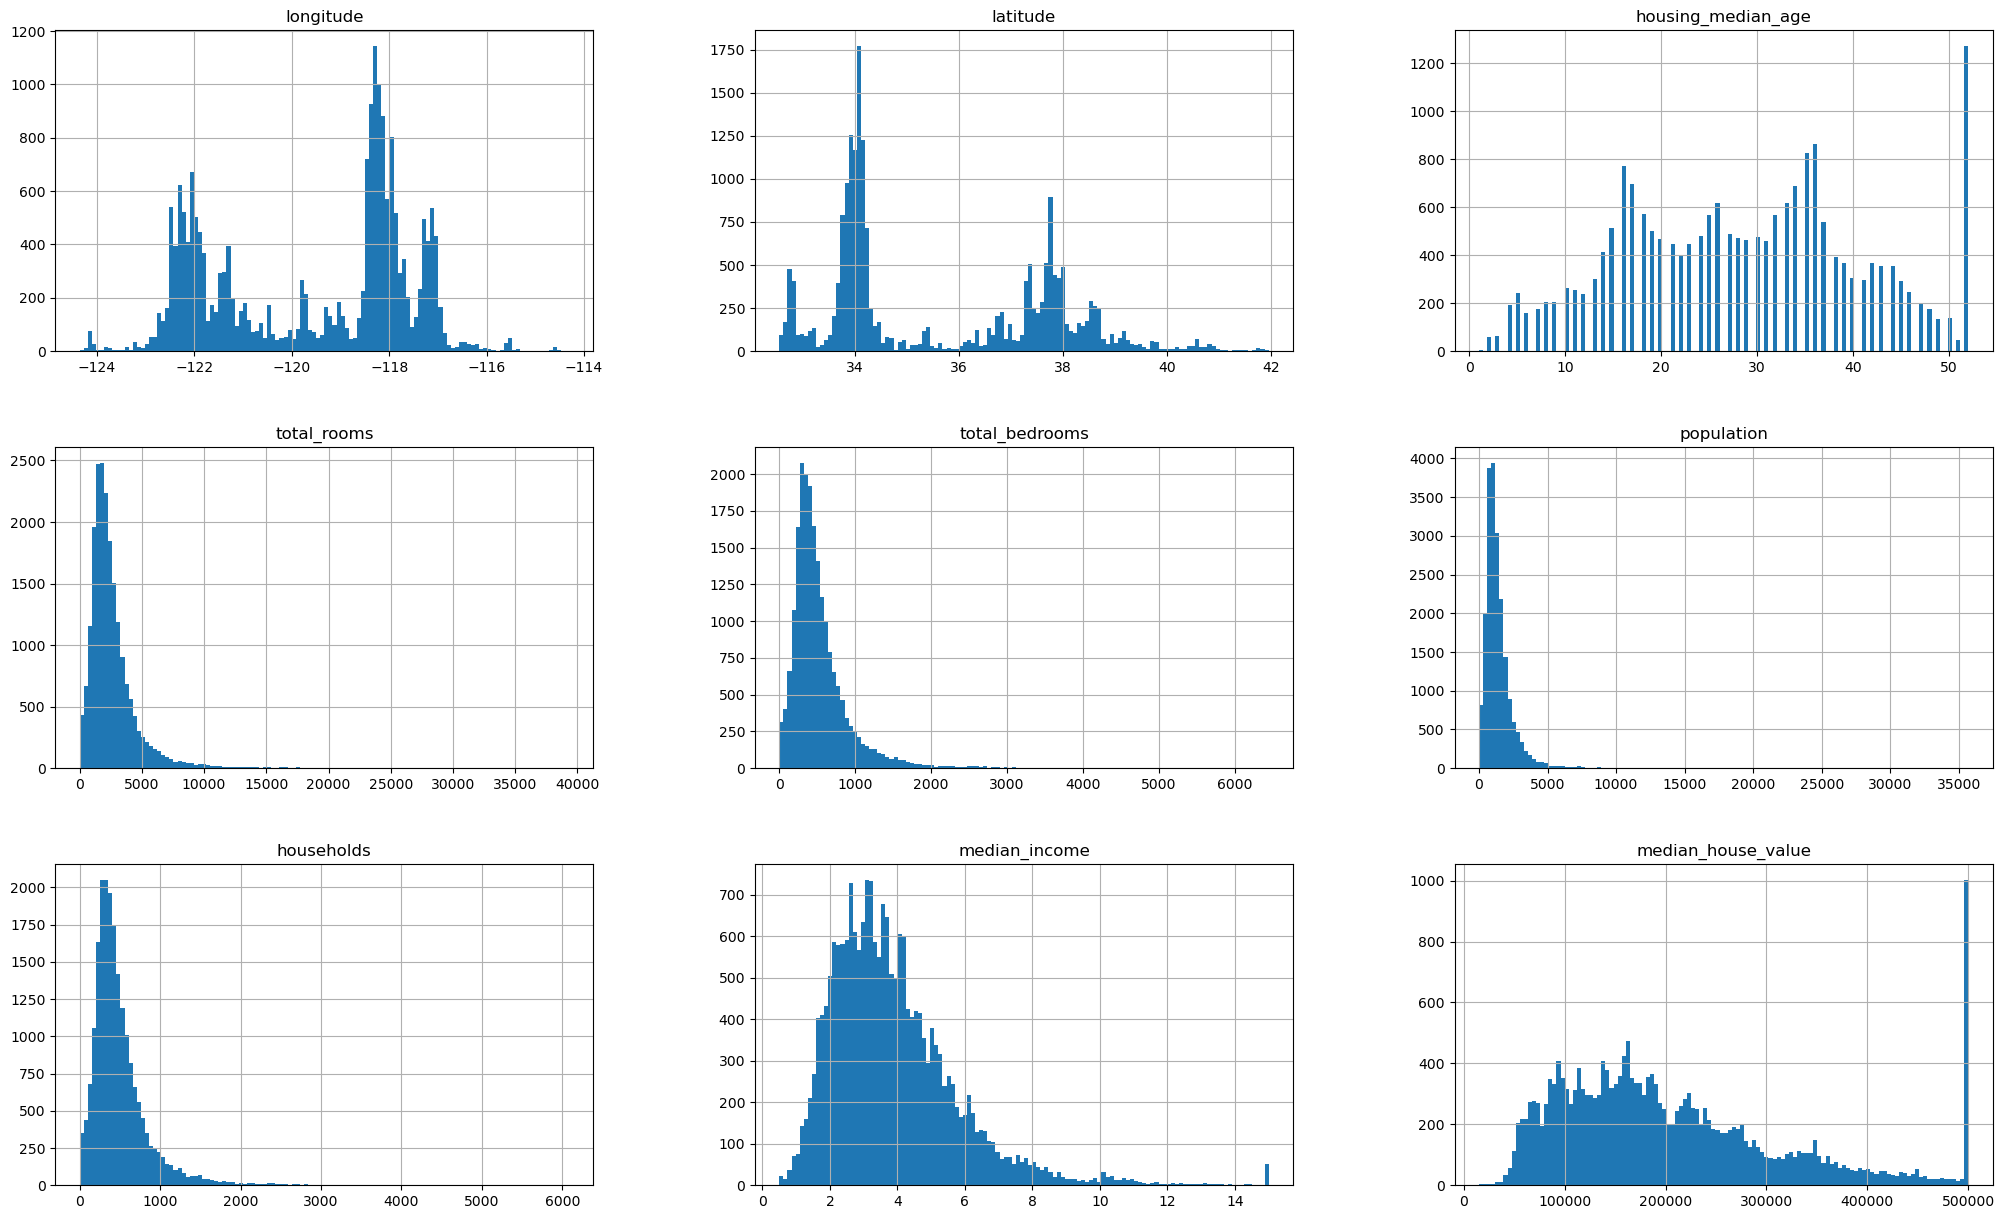

In [8]:
c_df.hist(bins=120,figsize=(25,15))
plt.show()

ohps! After vis,We see how large the **outliers** are in the **population** and median_house_value and ...etc columns, we will treat all these outliers in sections Pipline Data later, Do not be afraid!
***Remember*** that in **Normal Distribution** :the “68-95-99.7” rule applies: about
68% of the values fall within 1σ of the mean, 95% within 2σ, and 99.7% within 3σ.

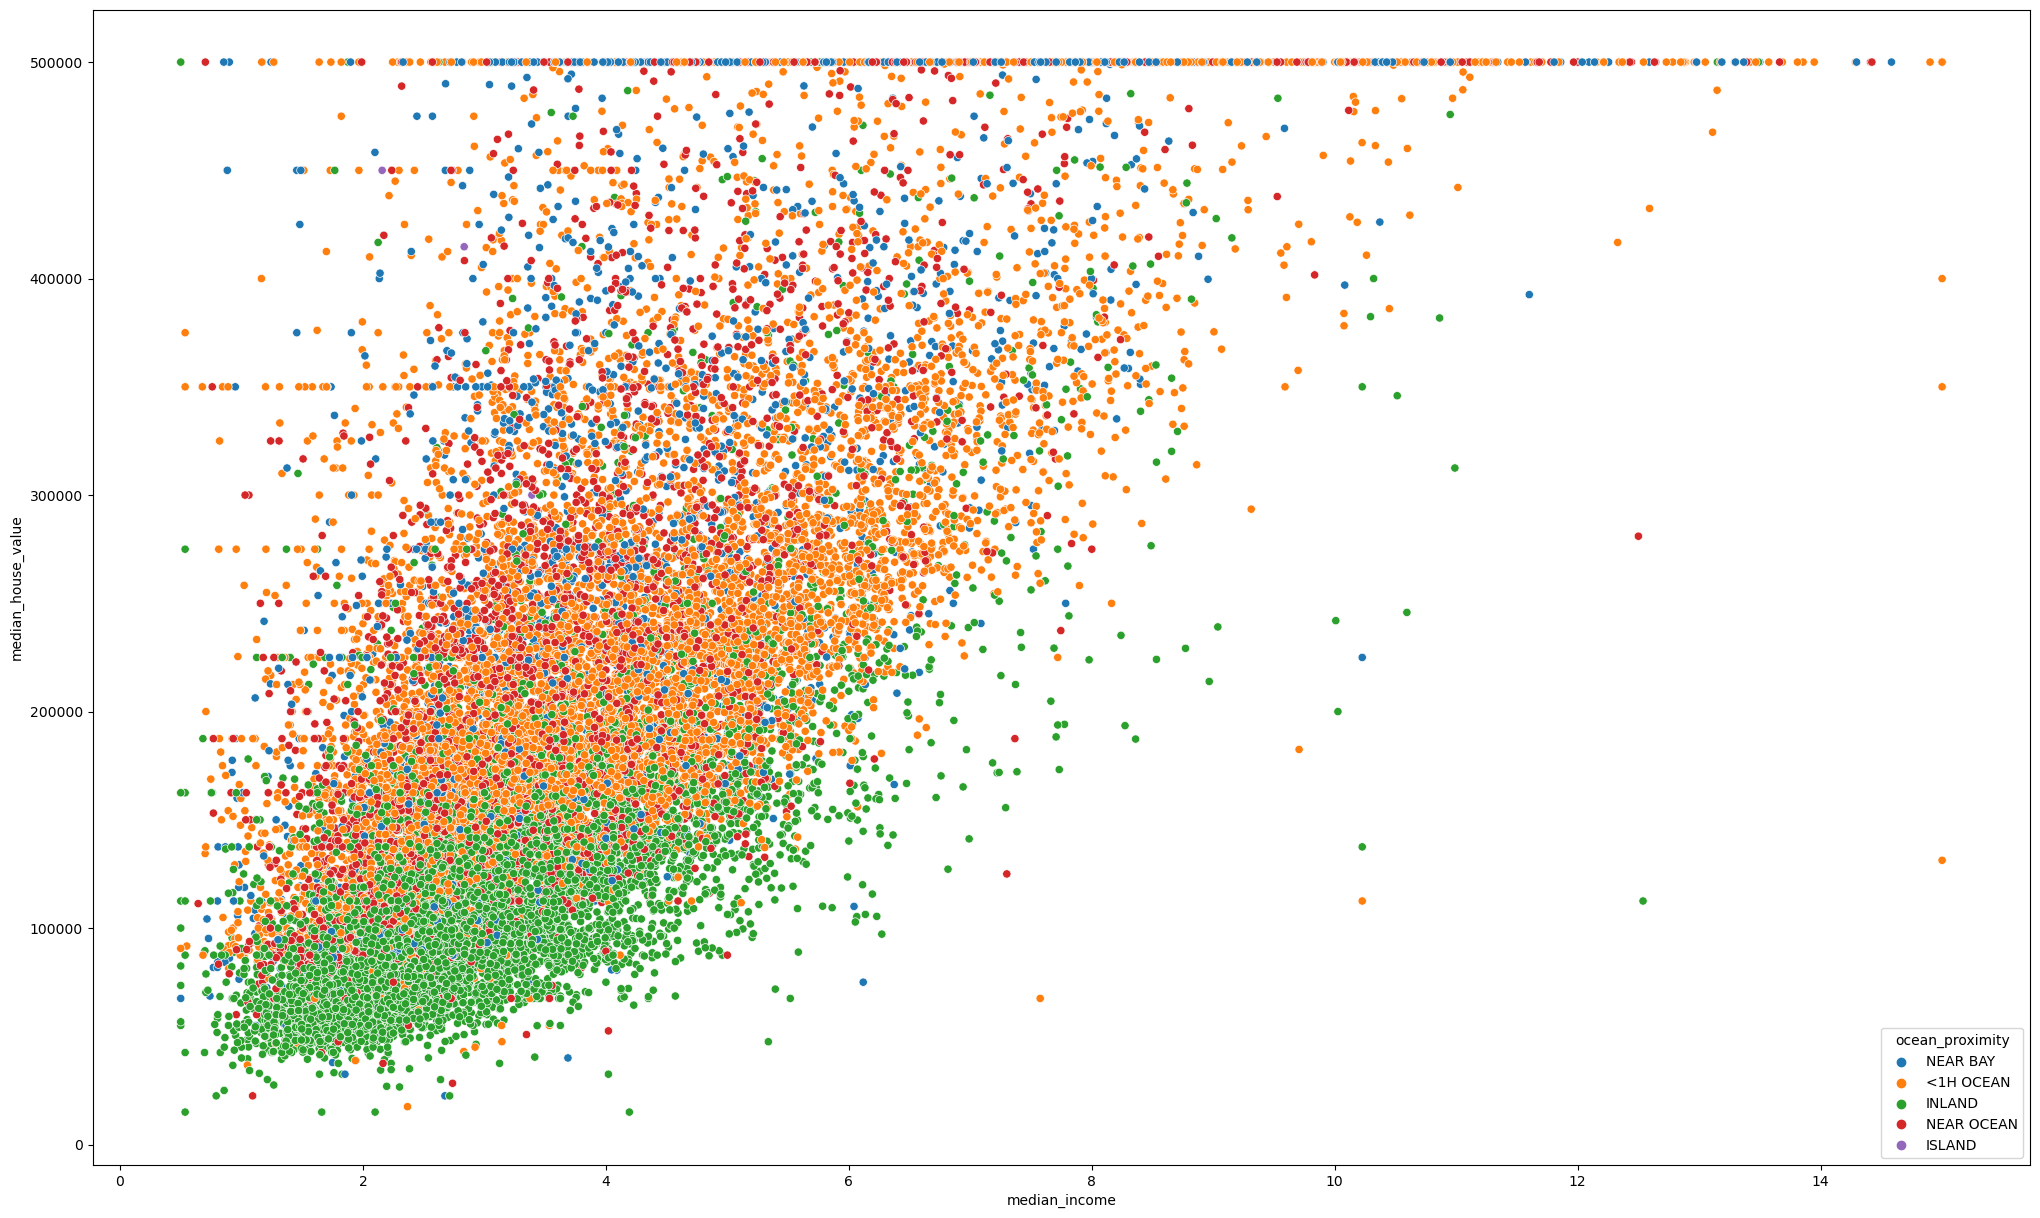

In [9]:
plt.figure(figsize=(25, 15))
sns.scatterplot(data=c_df,x="median_income",y="median_house_value",hue="ocean_proximity",sizes=(25,15))
plt.show()

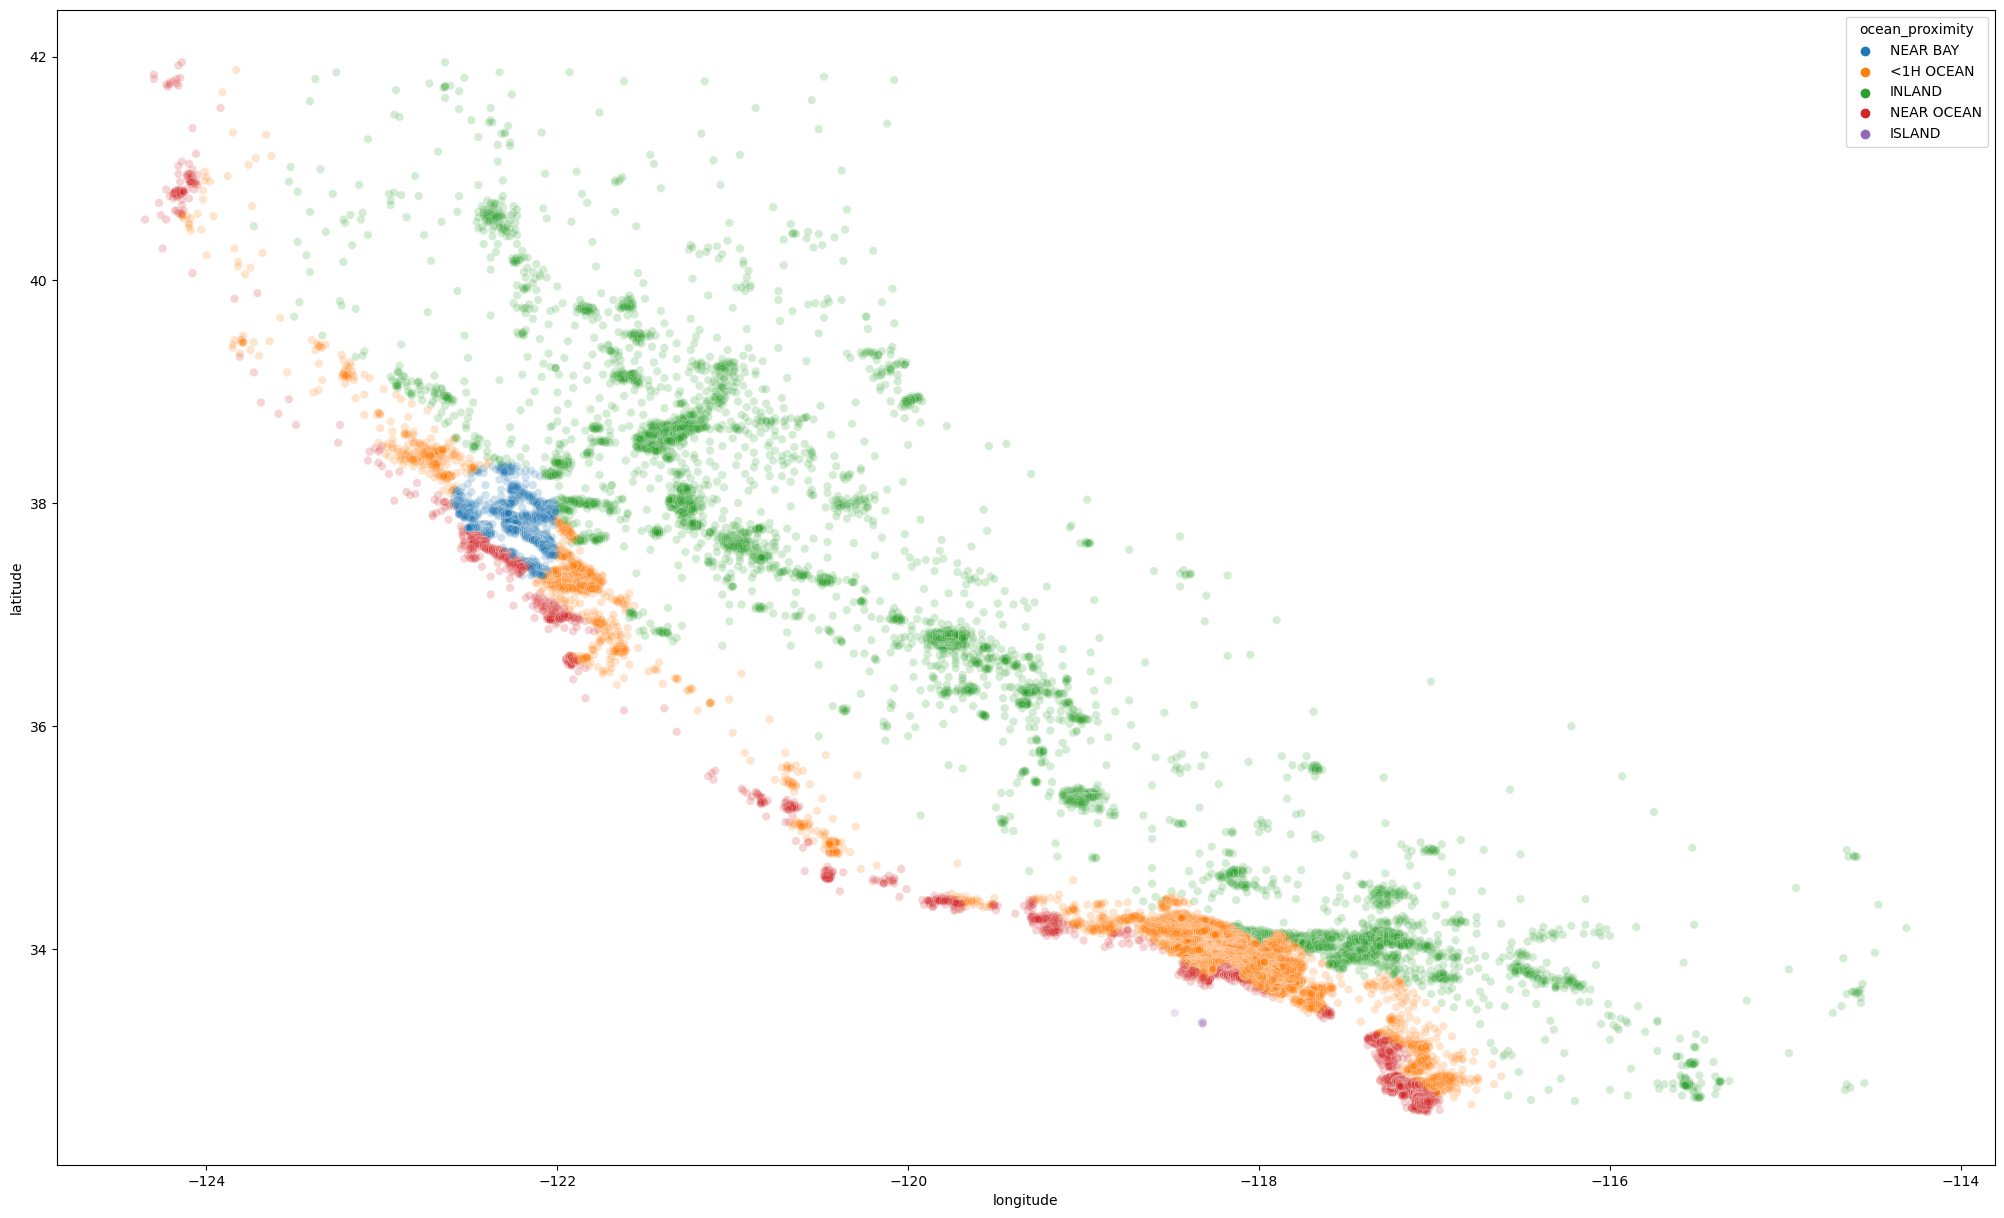

In [33]:
plt.figure(figsize=(25, 15))
sns.scatterplot(data=c_df,x="longitude",y="latitude",hue="ocean_proximity",sizes=(25,15), alpha=0.2)
plt.show()

em.. it appears that the district's inland is the minimum house pricing and the max house pricing is an island and near the ocean but the district's island had a few points on the contrary near the ocean had huge points

you can clearly see the high-density areas, namely the Bay
Area and around Los Angeles and San Diego, plus a long line of fairly high density in
the Central Valley, in particular around Sacramento and Fresno.

In [52]:
# plt.figure(figsize=(25, 15))
# sns.scatterplot(data=c_df,x="longitude",y="latitude",hue="median_house_value",size="population",sizes=(30, 200), alpha=0.3)
# plt.show()

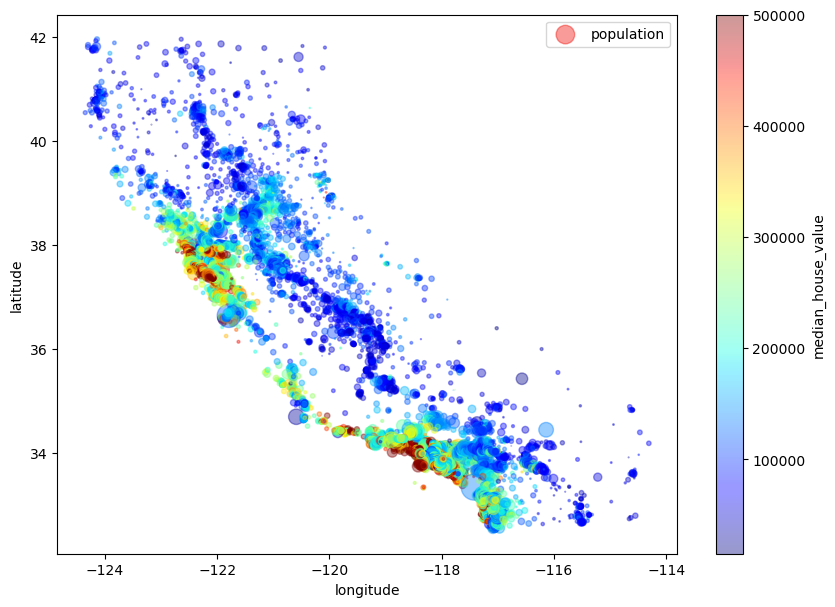

In [55]:
c_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=c_df["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

The drawing shows us that the higher the population density, the higher the house prices in that area

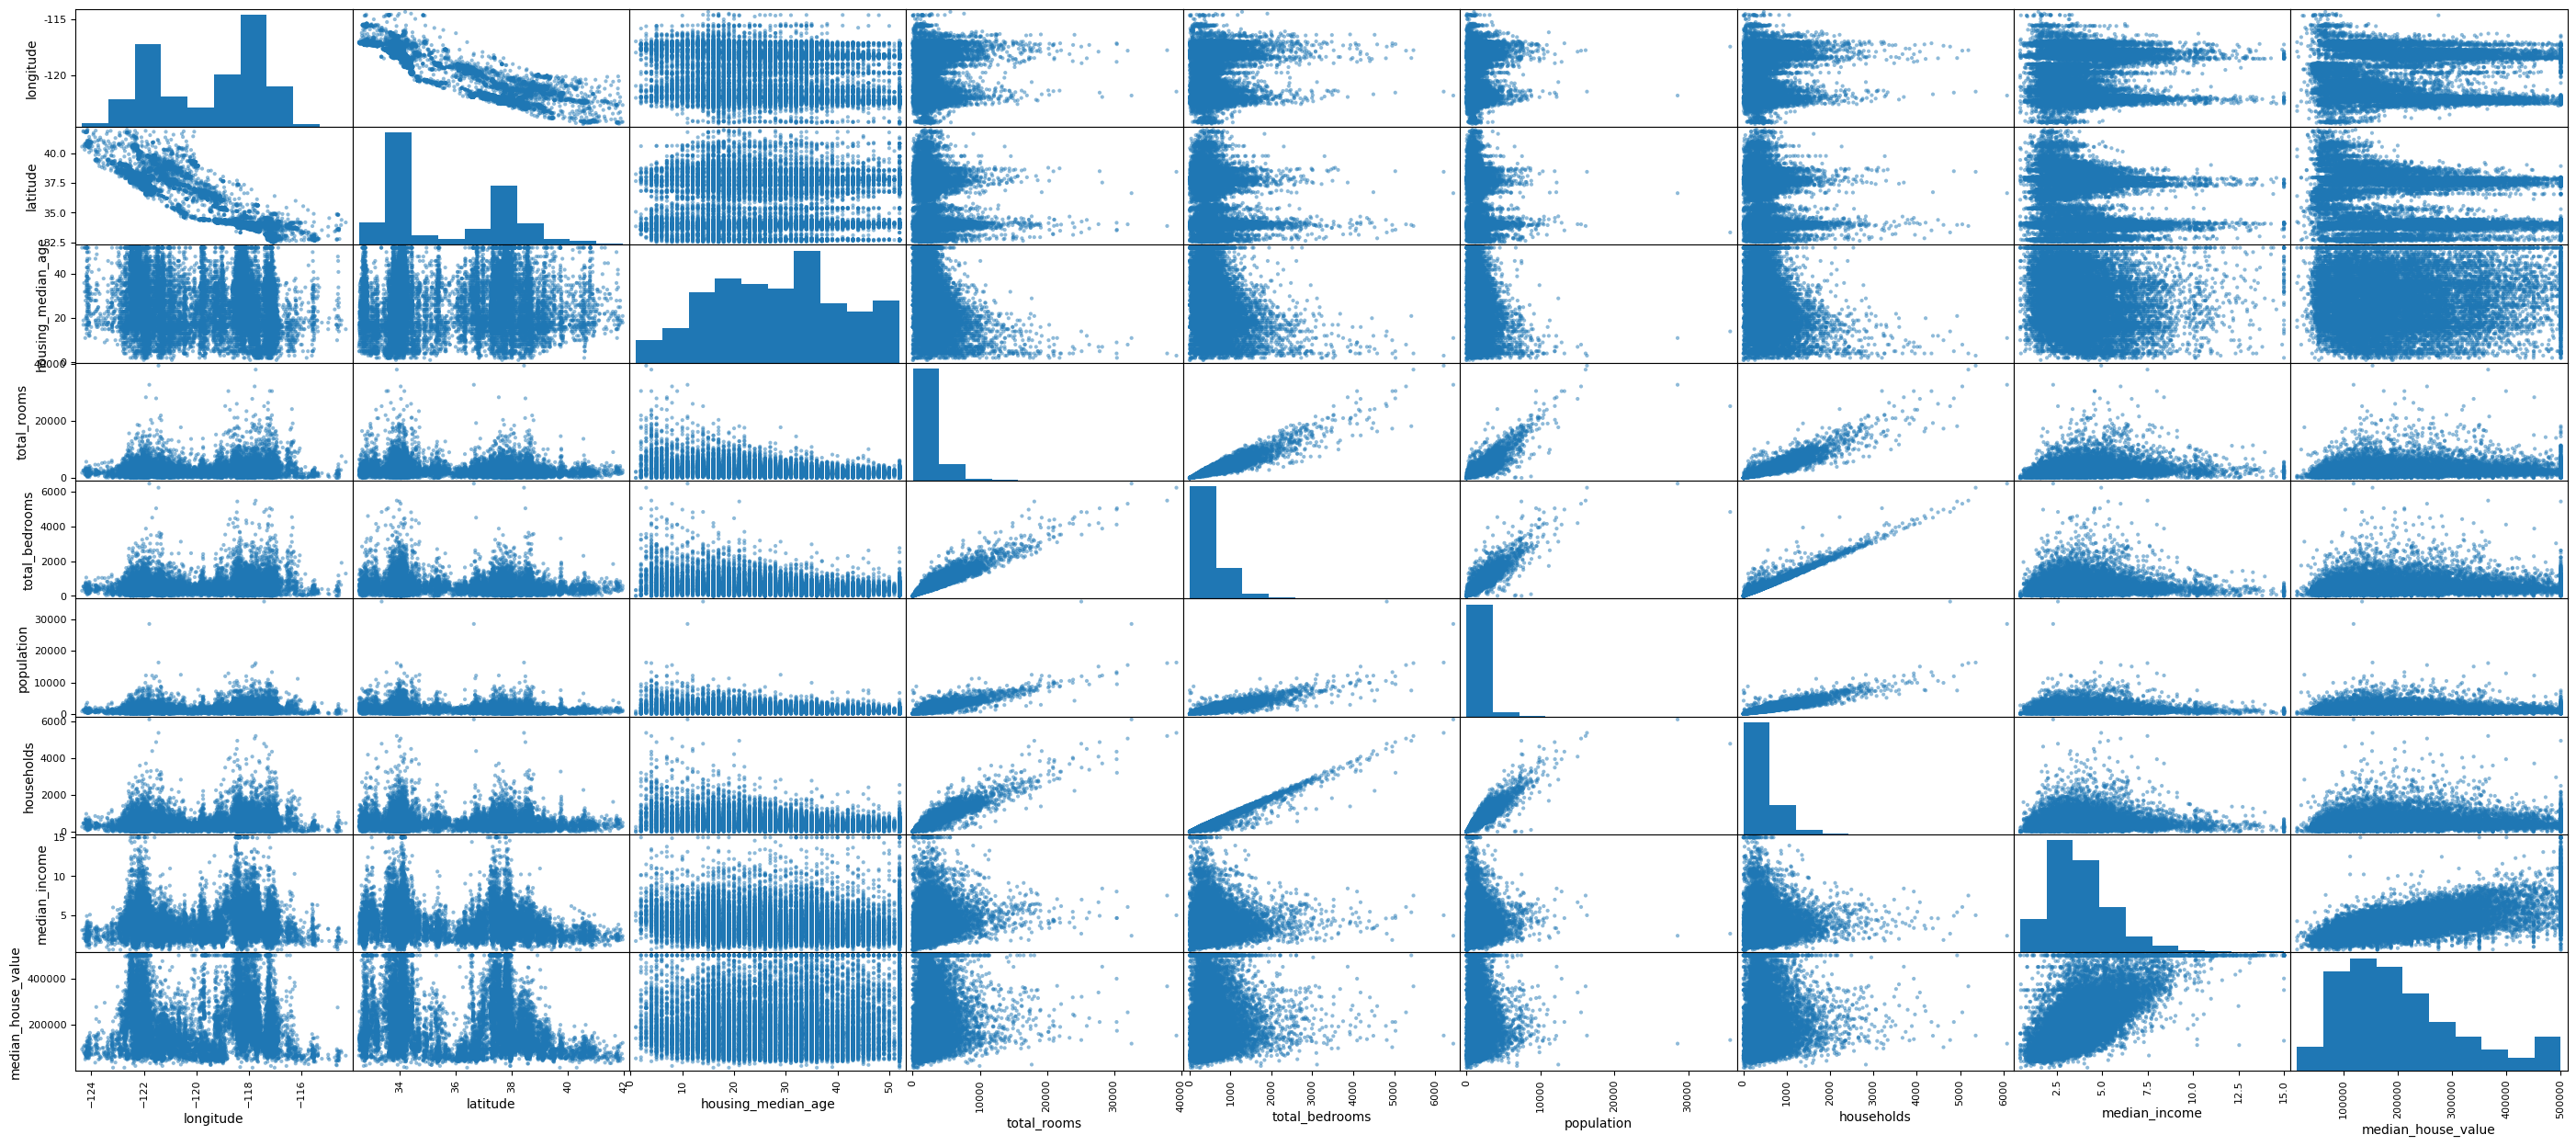

In [66]:
# plt.figure(figsize=(35,15))
pd.plotting.scatter_matrix(c_df,figsize=(35,15))
plt.show()

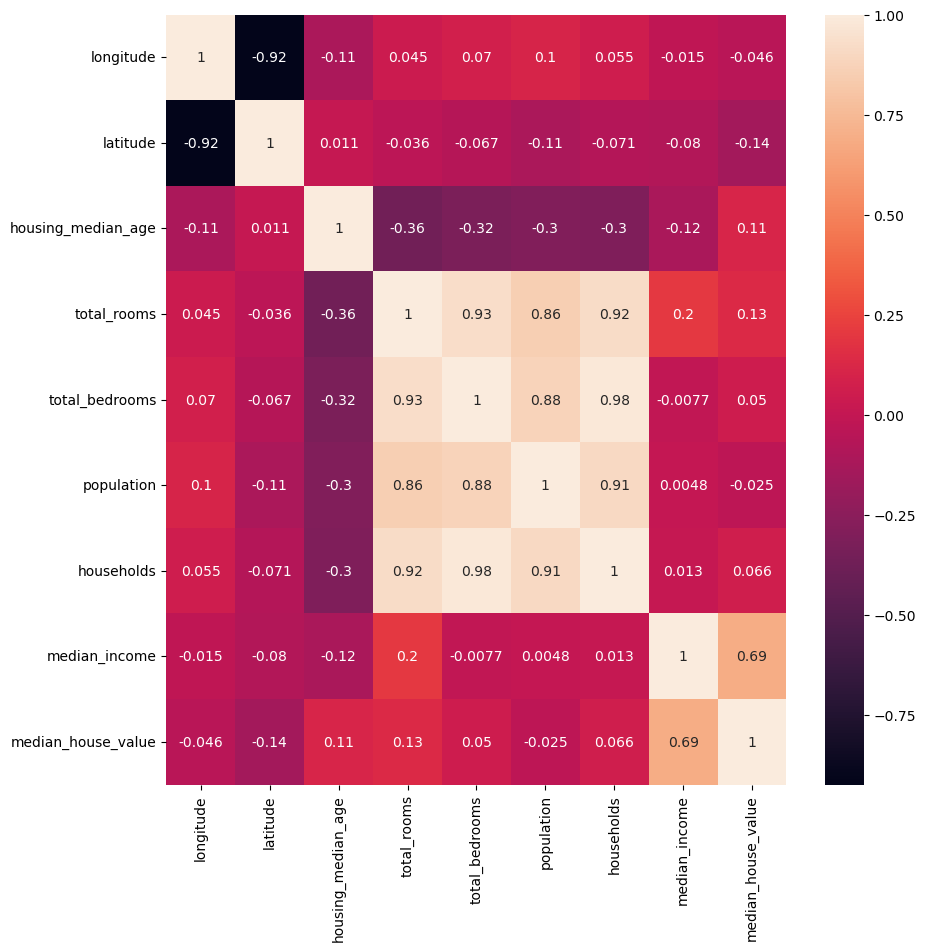

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(c_df.corr(), annot=True)
plt.show()

# Pipline Data

In [10]:
c_df["total_bedrooms"].fillna(c_df["total_bedrooms"].mean(), inplace=True)

In [11]:
c_df["rooms_per_household"] = c_df["total_rooms"]/c_df["households"]
c_df["bedrooms_per_room"] = c_df["total_bedrooms"]/c_df["total_rooms"]
c_df["rooms_per_population"]=c_df["total_rooms"]/c_df["population"]
# c_df["population_per_household"]=c_df["population"]/c_df["households"]
# c_df["bedrooms_per_households"] = c_df["total_bedrooms"]/c_df["households"]
# c_df["bedrooms_per_population"] = c_df["total_bedrooms"]/c_df["population"]

In [12]:
c_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  bedrooms_per_room  rooms_per_population  
0             6.984127           0.146591              2.732919  
1             6.238137           0.155797              2.956685  
2             8.288136           0.129516              2.957661  
3             5.817352           0.184458              2.283154  
4             6.281853           0.172096              2.879646

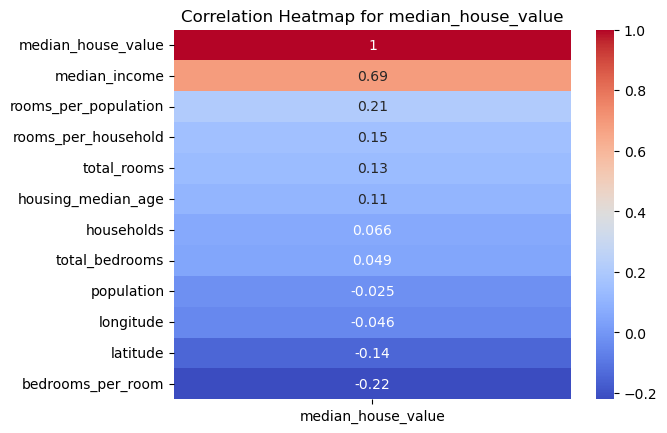

In [13]:
corr_matrix = c_df.corr()
heat=corr_matrix["median_house_value"].sort_values(ascending=False)
heat_df = pd.DataFrame(heat)
sns.heatmap(heat_df, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap for median_house_value')
plt.show()

The number of rooms per household is also more informative than the total number of rooms in a
district obviously the larger the houses, the more expensive they are.


In [14]:
from sklearn.preprocessing import OneHotEncoder


ocean_proximity = c_df[["ocean_proximity"]]
encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(ocean_proximity)
ocean_proximity_encoded_df = pd.DataFrame(ocean_proximity_encoded.toarray(), columns=encoder.get_feature_names_out(["ocean_proximity"]))
c_df_encoded = pd.concat([c_df, ocean_proximity_encoded_df], axis=1)
c_df_encoded.drop("ocean_proximity", axis=1, inplace=True)
c_df_encoded.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_household  bedrooms_per_room  rooms_per_population  \
0             6.984127           0.146591              2.732919   
1             6.238137           0.155797              2.956685   
2             8.288136           0.129516              2.957661   
3             5.817352           0.184458              2.283154   
4             6.281853           0.172096              2.879646   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

# Data Splitting and Transformation

In [39]:
X = c_df_encoded.drop(["median_house_value"],axis=1).values

In [40]:
y = c_df_encoded.loc[:,"median_house_value"].values

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
scaler.fit_transform(X)

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [44]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
X_train

array([[-117.03,   32.71,   33.  , ...,    0.  ,    0.  ,    1.  ],
       [-118.16,   33.77,   49.  , ...,    0.  ,    0.  ,    1.  ],
       [-120.48,   34.66,    4.  , ...,    0.  ,    0.  ,    1.  ],
       ...,
       [-118.38,   34.03,   36.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.96,   37.58,   15.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.42,   37.77,   52.  , ...,    0.  ,    1.  ,    0.  ]])

In [235]:
X_test

array([[-119.01,   36.06,   25.  , ...,    0.  ,    0.  ,    0.  ],
       [-119.46,   35.14,   30.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.44,   37.8 ,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-122.05,   37.31,   25.  , ...,    0.  ,    0.  ,    0.  ],
       [-119.76,   36.77,   36.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.37,   34.22,   17.  , ...,    0.  ,    0.  ,    0.  ]])

In [236]:
y_train

array([103000., 382100., 172600., ..., 222100., 283500., 325000.])

In [237]:
y_test

array([ 47700.,  45800., 500001., ..., 500001.,  72300., 151500.])

# Builtting & Testing Model

## Linear Regression

In [345]:
from sklearn.linear_model import LinearRegression

In [346]:
REG = LinearRegression()

In [347]:
REG.fit(X_train,y_train)

LinearRegression()

In [348]:
REG.coef_.round(0)

array([-2.91420e+04, -2.79170e+04,  1.07300e+03,  2.00000e+00,
        1.30000e+01, -2.20000e+01,  5.20000e+01,  4.18030e+04,
       -9.52300e+03,  2.36514e+05,  2.91890e+04, -1.74800e+04,
       -5.05110e+04,  1.10777e+05, -2.51910e+04, -1.75960e+04])

In [349]:
REG.intercept_

-2511082.867958473

## Decision Tree Regressor

In [350]:
from sklearn.tree import DecisionTreeRegressor
T_REG = DecisionTreeRegressor()


In [351]:
T_REG.fit(X_train, y_train)

DecisionTreeRegressor()

# Model Prediction

In [352]:
y_pred = REG.predict(X_test)
y_pred

array([ 71732.01701104, 136816.20842575, 296020.41503995, ...,
       448609.96917545, 119950.3704646 , 183686.44406371])

In [353]:
samples = X[:10]


In [354]:
samp = REG.predict(samples)
samp

array([411506.12545006, 439559.94711801, 370945.07615669, 321498.28189868,
       259804.38092117, 274589.09251164, 260095.03047976, 265643.92104342,
       203873.85204484, 267290.82135101])

In [355]:
df_pred = pd.DataFrame({"samples":samp
                        ,"predictions":c_df.loc[:9,"median_house_value"]})
df_pred

samples  predictions
0  411506.125450     452600.0
1  439559.947118     358500.0
2  370945.076157     352100.0
3  321498.281899     341300.0
4  259804.380921     342200.0
5  274589.092512     269700.0
6  260095.030480     299200.0
7  265643.921043     241400.0
8  203873.852045     226700.0
9  267290.821351     261100.0

In [356]:
Ty_pred = T_REG.predict(X_test)
Ty_pred

array([ 49100.,  73000., 500001., ..., 500001.,  65600., 271200.])

# Model Evaluation

In [357]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [358]:
print(f"REG Score: {REG.score(X_test, y_test)}\nTREE Score: {T_REG.score(X_test, y_test)}")

REG Score: 0.6110211436567112
TREE Score: 0.6206670073426379


In [359]:
MAE_REG = mean_absolute_error(y_test,y_pred).round(0)
MAE_TREE = mean_absolute_error(y_test,Ty_pred).round(0)

In [360]:
print(f"REG MAE: {MAE_REG}\nTREE MAE: {MAE_TREE}")

REG MAE: 49956.0
TREE MAE: 44315.0


In [361]:
MSE_REG = mean_squared_error(y_pred,y_test).round(0)
MSE_TREE = mean_squared_error(Ty_pred,y_test).round(0)

In [362]:
print(f"REG MSE: {MSE_REG}\nTREE MSE: {MSE_TREE}")

REG MSE: 5097213857.0
TREE MSE: 4970813593.0


# Fine-Tune Your Model

In [340]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [341]:
param_grid_RFG = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [342]:
RFG = RandomForestRegressor()
grid_search_RFG = GridSearchCV(RFG, param_grid_RFG, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search_RFG.fit(X_train, y_train)

best_params_RFG = grid_search_RFG.best_params_
best_estimator_RFG = grid_search_RFG.best_estimator_

print("Best Parameters:", best_params_RFG)
RGF_ypred = best_estimator_RFG.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

Best Parameters: {'max_features': 8, 'n_estimators': 30}


In [343]:
XGB= xgb.XGBRegressor()
grid_search_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid_XGB, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_XGB.fit(X_train, y_train)

best_params_XGB = grid_search_XGB.best_params_
best_estimator_XGB = grid_search_XGB.best_estimator_

print("Best Parameters:", best_params_XGB)
XGB_ypred = best_estimator_XGB.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


# Model Evaluation for All Models

In [363]:
print(f"""REG Score: {REG.score(X_test, y_test)}
\nTREE Score: {T_REG.score(X_test, y_test)}
\nRFG Score: {best_estimator_RFG.score(X_test, y_test)}
\nXGB Score: {best_estimator_XGB.score(X_test, y_test)}""")

REG Score: 0.6110211436567112

TREE Score: 0.6206670073426379

RFG Score: 0.8155064099189916

XGB Score: 0.8441207022022308


In [364]:
MAE_RFG = mean_absolute_error(RGF_ypred,y_test).round(0)
MAE_XGB = mean_absolute_error(XGB_ypred,y_test).round(0)

In [365]:
print(f"REG MAE: {MAE_REG}\nTREE MAE: {MAE_TREE}\nRFG MAE: {MAE_RFG}\nXGB MAE: {MAE_XGB}")

REG MAE: 49956.0
TREE MAE: 44315.0
RFG MAE: 32102.0
XGB MAE: 29000.0


In [366]:
MSE_RFG = mean_squared_error(RGF_ypred,y_test).round(0)
MSE_XGB = mean_squared_error(XGB_ypred,y_test).round(0)

In [367]:
print(f"REG MSE: {MSE_REG}\nTREE MSE: {MSE_TREE}\nRFG MSE: {MSE_RFG}\nXGB MSE: {MSE_XGB}")

REG MSE: 5097213857.0
TREE MSE: 4970813593.0
RFG MSE: 2417620569.0
XGB MSE: 2042656314.0


# Model Deployment

In [382]:
import pickle
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(best_estimator_XGB, file)


In [383]:
# predict
with open("xgboost_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [384]:
X_new = X[4580:4588]
predictions = loaded_model.predict(X_new)

print(predictions)

[176764.4  190765.42 136374.44 122619.75 189022.56 258679.98 125713.13
 140329.97]


In [387]:


df_pred_ = pd.DataFrame({"predictions":predictions.round(0)
                        ,"samples":c_df.loc[4580:4587,"median_house_value"]})
df_pred_

predictions   samples
4580     176764.0  400000.0
4581     190765.0  175000.0
4582     136374.0  137500.0
4583     122620.0  112500.0
4584     189023.0  187500.0
4585     258680.0  275000.0
4586     125713.0  110000.0
4587     140330.0  137500.0

# THANKS